# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

# Intro to the Dataset
## Cervical Cancer Risk Factors Analysis

**Dataset:** UCI Cervical Cancer Risk Factors (858 patients, 36 features)  
**Objective:** Implement PCA from scratch to identify key risk factor patterns in cervical cancer data


### Dataset Context
This dataset contains demographic information, habits, and historic medical records of 858 patients from Venezuela. Features include:
- **Demographic:** Age, number of sexual partners, age at first intercourse
- **Medical History:** Number of pregnancies, STD history, contraceptive use
- **Lifestyle:** Smoking habits, IUD usage
- **Diagnosis Tests:** Hinselmann, Schiller, Cytology, Biopsy results

**Clinical Relevance:** HPV infection is the major risk factor for cervical cancer. This analysis will help identify which combinations of risk factors are most predictive.

In [1]:
# Install required packages
!pip install -q pandas numpy matplotlib seaborn scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

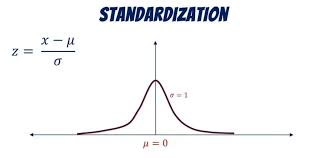


In [3]:
import pandas as pd
import numpy as np

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv"
df = pd.read_csv(url)

# Check first rows
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
# Step 3: Inspect and clean data

print("\nDataFrame info:")
df.info()

print("\nMissing values per column (top 20):")
display(df.isna().sum().sort_values(ascending=False).head(20))

display(df.describe(include='all').T.head(10))

# Identify and handle non-numeric columns
non_numeric = df.select_dtypes(exclude=[np.number])
print(f"\nNon-numeric columns ({non_numeric.shape[1]}):", list(non_numeric.columns))
display(non_numeric.head())

# Handle non-numeric columns:
encoded_df = df.copy()
for c in non_numeric.columns:
    n_unique = df[c].nunique(dropna=False)
    if n_unique <= 20:
        dummies = pd.get_dummies(df[c].astype('category'), prefix=c, dummy_na=True)
        encoded_df = pd.concat([encoded_df.drop(columns=[c]), dummies], axis=1)
    else:
        encoded_df[c] = df[c].astype('category').cat.codes

print("After encoding non-numeric columns:", encoded_df.shape)

# Keep numeric columns only
numeric_df = encoded_df.select_dtypes(include=[np.number]).dropna(axis=1, how='all')

# Fill NaN with mean of each column
numeric_df = numeric_df.fillna(numeric_df.mean())

# Remove constant columns (0 std, population definition for consistency)
numeric_df = numeric_df.loc[:, numeric_df.std(ddof=0) != 0]

print("\nCheck for remaining NaNs:", numeric_df.isna().sum().sum())
print("Numeric features kept:", numeric_df.shape[1])
display(numeric_df.head())



DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 n

,0
Age,0
Number of sexual partners,0
First sexual intercourse,0
Num of pregnancies,0
Smokes,0
Smokes (years),0
Smokes (packs/year),0
Hormonal Contraceptives,0
Hormonal Contraceptives (years),0
IUD,0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,858.0,NaN,NaN,NaN,26.820513,8.497948,13.0,20.0,25.0,32.0,84.0
Number of sexual partners,858,13,2.0,272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
First sexual intercourse,858,22,15.0,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num of pregnancies,858,12,1.0,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Smokes,858,3,0.0,722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Smokes (years),858,31,0.0,722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Smokes (packs/year),858,63,0.0,722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hormonal Contraceptives,858,3,1.0,481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hormonal Contraceptives (years),858,41,0.0,269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IUD,858,3,0.0,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Non-numeric columns (26): ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']


,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),...,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Time since first diagnosis,STDs: Time since last diagnosis
0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
1,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
2,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
3,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
4,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?


After encoding non-numeric columns: (858, 151)

Check for remaining NaNs: 0
Numeric features kept: 15


,Age,First sexual intercourse,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,5,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,4,0,0,0,0,0,0,0,0,0,0,0,0,0
2,34,21,0,0,0,0,0,0,0,0,0,0,0,0,0
3,52,6,23,49,29,0,0,1,0,1,0,0,0,0,0
4,46,11,0,0,20,0,0,0,0,0,0,0,0,0,0


In [5]:
# Statistical summary
print("\nStatistical Summary:")
df.describe().T


Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
Age,858.0,26.820513,8.497948,13.0,20.0,25.0,32.0,84.0
STDs: Number of diagnosis,858.0,0.087413,0.302545,0.0,0.0,0.0,0.0,3.0
Dx:Cancer,858.0,0.020979,0.143398,0.0,0.0,0.0,0.0,1.0
Dx:CIN,858.0,0.010490,0.101939,0.0,0.0,0.0,0.0,1.0
Dx:HPV,858.0,0.020979,0.143398,0.0,0.0,0.0,0.0,1.0
Dx,858.0,0.027972,0.164989,0.0,0.0,0.0,0.0,1.0
Hinselmann,858.0,0.040793,0.197925,0.0,0.0,0.0,0.0,1.0
Schiller,858.0,0.086247,0.280892,0.0,0.0,0.0,0.0,1.0
Citology,858.0,0.051282,0.220701,0.0,0.0,0.0,0.0,1.0
Biopsy,858.0,0.064103,0.245078,0.0,0.0,0.0,0.0,1.0



## Step 2: Data Preprocessing and Cleaning



Found 3 highly correlated feature pairs (|r| > 0.7)

Top 5 correlations:
  Dx:Cancer ↔ Dx:HPV: r = 0.887
  Smokes (years) ↔ Smokes (packs/year): r = 0.824
  Schiller ↔ Biopsy: r = 0.733


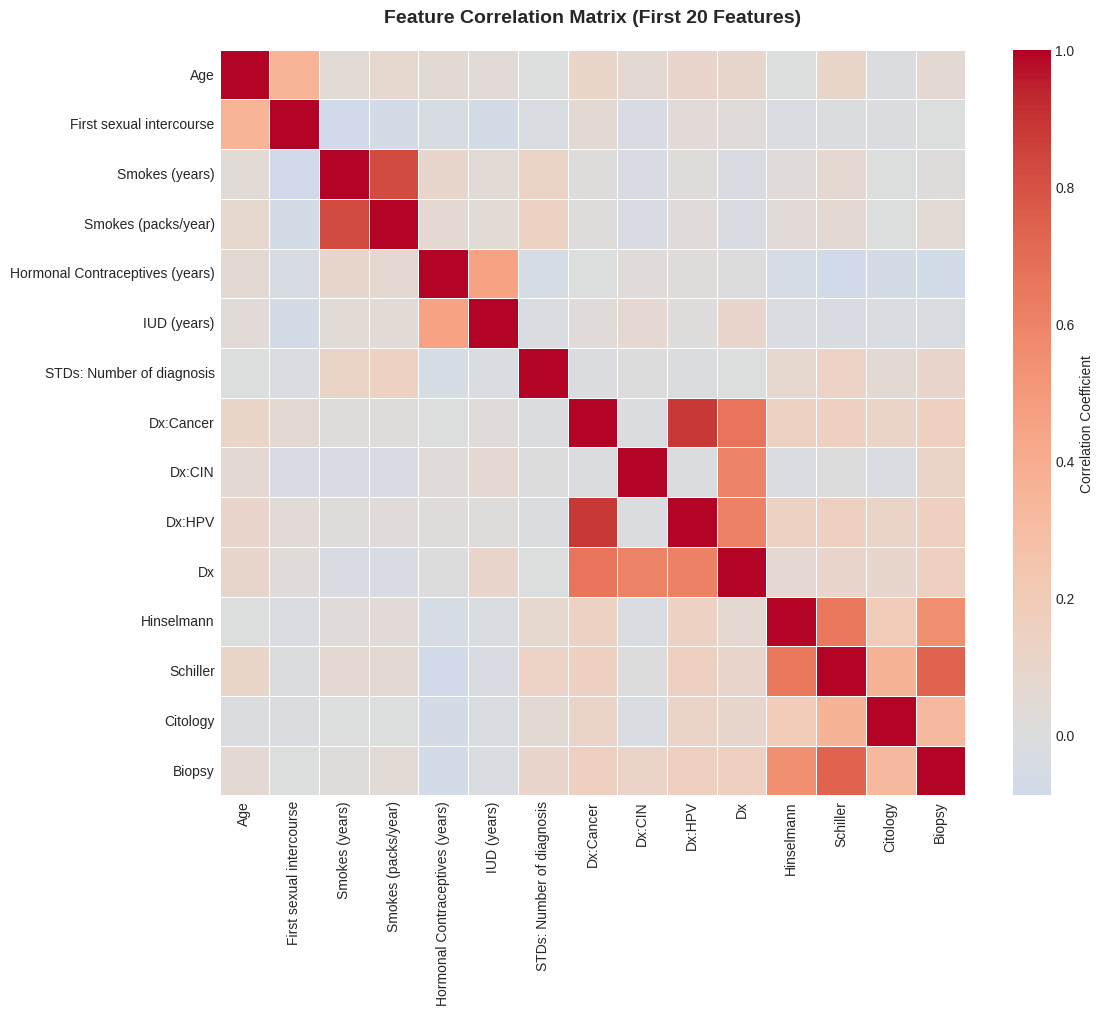


My Interpretation:
High correlations indicate redundant information across features.
PCA will combine these correlated features into uncorrelated principal components,
reducing multicollinearity and revealing underlying patterns in the risk factors.


In [6]:
# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Find highly correlated features
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

print(f"Found {len(high_corr_pairs)} highly correlated feature pairs (|r| > 0.7)")
if len(high_corr_pairs) > 0:
    print("\nTop 5 correlations:")
    for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:5]:
        print(f"  {feat1} ↔ {feat2}: r = {corr:.3f}")

# Visualize correlation heatmap (top features)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix.iloc[:20, :20],
            cmap='coolwarm',
            center=0,
            annot=False,
            square=True,
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Feature Correlation Matrix (First 20 Features)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nMy Interpretation:")
print("High correlations indicate redundant information across features.")
print("PCA will combine these correlated features into uncorrelated principal components,")
print("reducing multicollinearity and revealing underlying patterns in the risk factors.")

## Step 4: Standardization (Z-Score Normalization)

### Why Standardization?
PCA is sensitive to feature scales. Features with larger ranges would dominate the principal components if not standardized. We transform all features to have:
- **Mean (μ) = 0**
- **Standard Deviation (σ) = 1**

### Formula:
$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- $x$ = original value
- $\mu$ = mean of feature
- $\sigma$ = standard deviation (using sample std with ddof=1)

In [7]:
# Convert to numpy array
X = numeric_df.values  # Shape: (n_samples, n_features)
feature_names = numeric_df.columns.tolist()

print(f"Data matrix shape: {X.shape}")
print(f"Number of samples (patients): {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

# Standardization implementation
means = np.mean(X, axis=0)
stds = np.std(X, axis=0, ddof=1)  # Sample standard deviation

# Prevent division by zero (for constant features, though we removed them)
stds_fixed = stds.copy()
stds_fixed[stds_fixed == 0] = 1.0

# Apply standardization
standardized_data = (X - means) / stds_fixed

# Verification
print("\nVerification after standardization:")
print(f"  Mean of first feature: {np.mean(standardized_data[:, 0]):.10f} (should be ~0)")
print(f"  Std of first feature: {np.std(standardized_data[:, 0], ddof=1):.10f} (should be ~1)")
print(f"  Any NaN values: {np.isnan(standardized_data).any()}")
print(f"  Any Inf values: {np.isinf(standardized_data).any()}")

# Display first few rows
print("\nFirst 3 patients (standardized):")
standardized_data[:3, :5]  # Show first 5 features

Data matrix shape: (858, 15)
Number of samples (patients): 858
Number of features: 15

Verification after standardization:
  Mean of first feature: -0.0000000000 (should be ~0)
  Std of first feature: 1.0000000000 (should be ~1)
  Any NaN values: False
  Any Inf values: False

First 3 patients (standardized):


array([[-1.03795796, -0.6902926 , -0.36007247, -0.363943  , -1.01896579],
       [-1.39098436, -1.01787615, -0.36007247, -0.363943  , -1.01896579],
       [ 0.8448495 ,  4.55104416, -0.36007247, -0.363943  , -1.01896579]])

### Step 5: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

 - **Diagonal elements:** Variance of each feature
- **Off-diagonal elements:** Covariance between feature pairs

### Formula:
$$
\text{Cov}(X) = \frac{1}{n-1} X^T X
$$

Where $X$ is the standardized data matrix.-


In [8]:
# Calculate covariance matrix
cov_matrix = np.cov(standardized_data, rowvar=False)
cov_matrix

print(f"Covariance matrix shape: {cov_matrix.shape}")
print(f"This is a {cov_matrix.shape[0]}×{cov_matrix.shape[1]} symmetric matrix")



# Display portion of covariance matrix
print("\nFirst 5×5 block of covariance matrix:")
pd.DataFrame(cov_matrix[:5, :5],
             columns=feature_names[:5],
             index=feature_names[:5]).round(3)

Covariance matrix shape: (15, 15)
This is a 15×15 symmetric matrix

First 5×5 block of covariance matrix:


,Age,First sexual intercourse,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years)
Age,1.000,0.357,0.039,0.077,0.051
First sexual intercourse,0.357,1.000,-0.086,-0.068,-0.046
Smokes (years),0.039,-0.086,1.000,0.824,0.086
Smokes (packs/year),0.077,-0.068,0.824,1.000,0.068
Hormonal Contraceptives (years),0.051,-0.046,0.086,0.068,1.000


### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

### The Math behind it

For covariance matrix $C$:
$$
C \mathbf{v} = \lambda \mathbf{v}
$$

Where:
- $\mathbf{v}$ = eigenvector (direction of principal component)
- $\lambda$ = eigenvalue (variance explained by that component)




In [9]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues, eigenvectors

(array([2.98404584, 2.14062308, 1.89799142, 1.42968562, 1.32912836,
        1.24365746, 0.08299925, 0.13215361, 0.17015828, 0.2389068 ,
        0.42363607, 0.61579702, 0.54307936, 0.92740174, 0.84073611]),
 array([[ 1.01972726e-01,  7.71737778e-02,  7.27398922e-02,
          1.91061536e-01, -6.60847254e-01, -1.24185373e-01,
          2.31947997e-02,  1.97238885e-02,  5.14878443e-02,
          8.36529020e-02,  1.26063804e-01, -6.79617977e-01,
         -2.40173391e-02,  7.84613458e-03,  2.68730579e-02],
        [ 2.83807928e-02,  8.52508888e-02, -9.81909337e-02,
          3.20979073e-01, -6.17885945e-01, -6.70123797e-02,
         -9.68183455e-03, -3.37590085e-02, -8.44520585e-03,
         -3.79872027e-02, -4.34626732e-02,  6.92075433e-01,
          5.55482486e-02, -4.67569287e-02,  6.40867080e-02],
        [ 4.36486921e-02, -1.92970272e-01,  6.30158951e-01,
          1.47791219e-01,  5.66031989e-02, -8.07083105e-02,
          1.87908435e-02, -4.07083299e-02,  6.82598081e-01,
         -1.

## Significance of Eigenvalues and Eigenvectors
- Eigenvalues indicate the amount of variance captured by each principal component. Larger eigenvalues correspond to directions in the data with more variability.
- Eigenvectors define the directions (axes) along which the data is projected. Each eigenvector is a principal component.
- By sorting eigenvalues in descending order, we prioritize components that retain the most information.
- Selecting the top principal components based on explained variance allows us to reduce dimensionality while preserving key patterns in the data.




### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [10]:
# Step 5: Sort Principal Components
# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Calculate explained variance
total_variance = np.sum(sorted_eigenvalues)
explained_variance_ratio = sorted_eigenvalues / total_variance
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Principal Components Ranked by Explained Variance:\n")
print(f"{'PC':<5} {'Eigenvalue':<12} {'Variance %':<12} {'Cumulative %':<15}")

for i in range(min(10, len(sorted_eigenvalues))):
    print(f"PC{i+1:<3} {sorted_eigenvalues[i]:<12.4f} "
          f"{explained_variance_ratio[i]*100:<12.2f} "
          f"{cumulative_variance[i]*100:<15.2f}")

# So with this, an example would be
print(f"\n• PC1 captures {explained_variance_ratio[0]*100:.2f}% of total variance")
print(f"• First 3 PCs capture {cumulative_variance[2]*100:.2f}% of variance")
print(f"• First 5 PCs capture {cumulative_variance[4]*100:.2f}% of variance")

Principal Components Ranked by Explained Variance:

PC    Eigenvalue   Variance %   Cumulative %   
PC1   2.9840       19.89        19.89          
PC2   2.1406       14.27        34.16          
PC3   1.8980       12.65        46.82          
PC4   1.4297       9.53         56.35          
PC5   1.3291       8.86         65.21          
PC6   1.2437       8.29         73.50          
PC7   0.9274       6.18         79.68          
PC8   0.8407       5.60         85.29          
PC9   0.6158       4.11         89.39          
PC10  0.5431       3.62         93.01          

• PC1 captures 19.89% of total variance
• First 3 PCs capture 46.82% of variance
• First 5 PCs capture 65.21% of variance


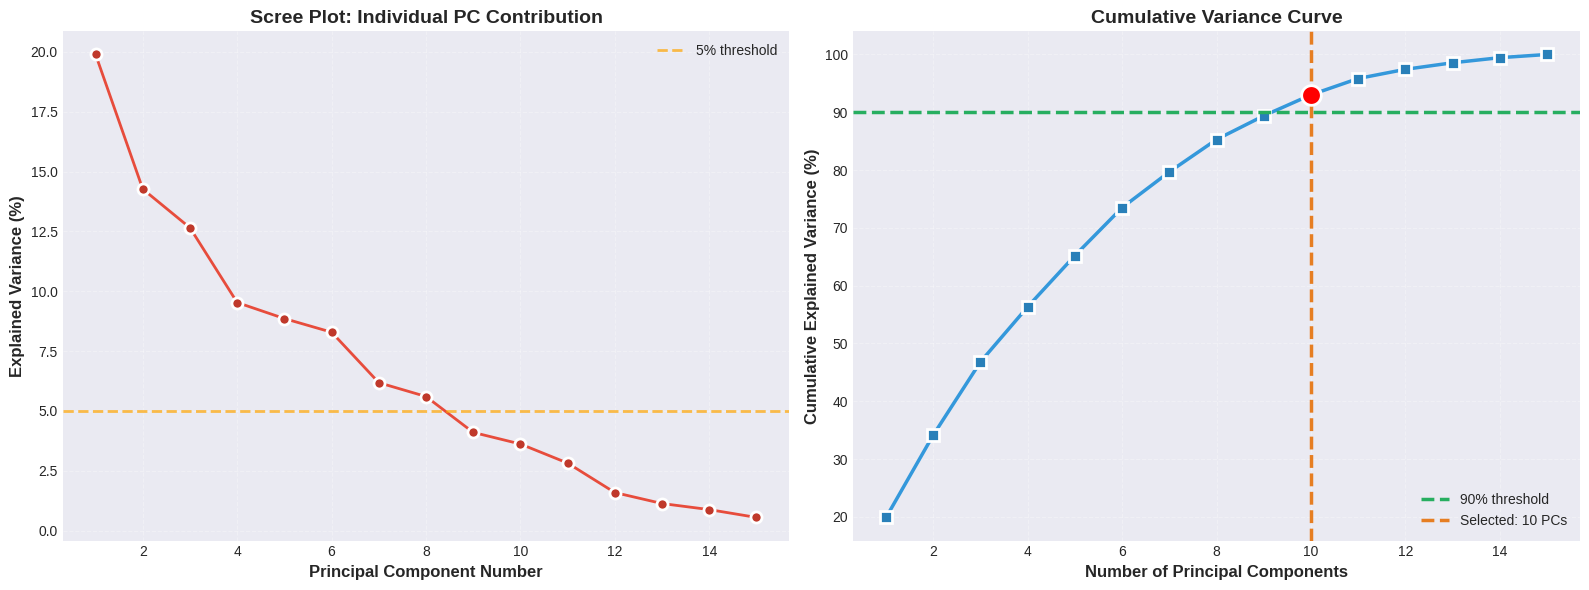


DETAILED PLOT INTERPRETATION:

SCREE PLOT (Left):
  • Shows the diminishing returns of adding more components
  • PC1 dominates with 19.89% variance
  • The 'elbow' occurs around PC9, where variance drops below 5%
  • After the elbow, additional PCs contribute minimally

  Clinical Meaning: The first few PCs capture the main risk factor patterns.
  Later PCs likely represent noise or very specific patient subgroups.

CUMULATIVE VARIANCE CURVE (Right):
  • Selected 10 components to retain 90% of information
  • This reduces dimensionality from 15 → 10 features
  • Compression ratio: 33.3% reduction
  • Trade-off: We lose 7.0% of variance but gain interpretability

Clinical Meaning: We can explain 93.0% of the
  variation in cervical cancer risk using just 10 composite risk factors
  instead of tracking all 15 original variables.


In [11]:
# Create comprehensive variance visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scree Plot (Individual Variance)
axes[0].plot(range(1, len(explained_variance_ratio) + 1),
             explained_variance_ratio * 100,
             marker='o', markersize=8, linewidth=2, color='#e74c3c',
             markerfacecolor='#c0392b', markeredgewidth=2, markeredgecolor='white')
axes[0].set_xlabel('Principal Component Number', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Explained Variance (%)', fontsize=12, fontweight='bold')
axes[0].set_title('Scree Plot: Individual PC Contribution', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].axhline(y=5, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='5% threshold')
axes[0].legend()

# Cumulative Variance Plot
threshold = 0.90
num_components = int(np.argmax(cumulative_variance >= threshold) + 1)
num_components = max(num_components, 2)  # Minimum 2 for visualization

axes[1].plot(range(1, len(cumulative_variance) + 1),
             cumulative_variance * 100,
             marker='s', markersize=8, linewidth=2.5, color='#3498db',
             markerfacecolor='#2980b9', markeredgewidth=2, markeredgecolor='white')
axes[1].axhline(y=threshold*100, color='#27ae60', linestyle='--',
                linewidth=2.5, label=f'{threshold*100:.0f}% threshold')
axes[1].axvline(x=num_components, color='#e67e22', linestyle='--',
                linewidth=2.5, label=f'Selected: {num_components} PCs')
axes[1].scatter([num_components], [cumulative_variance[num_components-1]*100],
                s=200, c='red', zorder=5, edgecolors='white', linewidth=2)
axes[1].set_xlabel('Number of Principal Components', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cumulative Explained Variance (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Cumulative Variance Curve', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].legend(loc='lower right', fontsize=10)

plt.tight_layout()
plt.show()

print("\nDETAILED PLOT INTERPRETATION:")

print("\nSCREE PLOT (Left):")
print(f"  • Shows the diminishing returns of adding more components")
print(f"  • PC1 dominates with {explained_variance_ratio[0]*100:.2f}% variance")
print(f"  • The 'elbow' occurs around PC{np.argmax(explained_variance_ratio < 0.05) + 1}, "
      f"where variance drops below 5%")
print(f"  • After the elbow, additional PCs contribute minimally")
print(f"\n  Clinical Meaning: The first few PCs capture the main risk factor patterns.")
print(f"  Later PCs likely represent noise or very specific patient subgroups.")

print("\nCUMULATIVE VARIANCE CURVE (Right):")
print(f"  • Selected {num_components} components to retain {threshold*100:.0f}% of information")
print(f"  • This reduces dimensionality from {len(feature_names)} → {num_components} features")
print(f"  • Compression ratio: {(1 - num_components/len(feature_names))*100:.1f}% reduction")
print(f"  • Trade-off: We lose {(1-cumulative_variance[num_components-1])*100:.1f}% of variance "
      f"but gain interpretability")

print(f"\nClinical Meaning: We can explain {cumulative_variance[num_components-1]*100:.1f}% of the")
print(f"  variation in cervical cancer risk using just {num_components} composite risk factors")
print(f"  instead of tracking all {len(feature_names)} original variables.")


### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [12]:
print(f"Selected {num_components} principal components for 90% variance retention\n")

# Select top k eigenvectors
top_eigenvectors = sorted_eigenvectors[:, :num_components]
print(f"Top eigenvectors matrix shape: {top_eigenvectors.shape}")
print(f"  (features × PCs) = ({top_eigenvectors.shape[0]} × {top_eigenvectors.shape[1]})")

# Project data onto principal components
reduced_data = np.dot(standardized_data, top_eigenvectors)

print(f"\nReduced data shape: {reduced_data.shape}")
print(f"  (patients × PCs) = ({reduced_data.shape[0]} × {reduced_data.shape[1]})")

print(f"\nDimensionality Reduction Summary:")
print(f"  Original: {standardized_data.shape[1]} features")
print(f"  Reduced:  {reduced_data.shape[1]} components")
print(f"  Reduction: {((1 - reduced_data.shape[1]/standardized_data.shape[1])*100):.1f}%")
print(f"  Variance retained: {cumulative_variance[num_components-1]*100:.2f}%")

# Display first few patients in PC space
print("\nFirst 5 patients in PC space:")
pc_df = pd.DataFrame(reduced_data[:5],
                     columns=[f'PC{i+1}' for i in range(num_components)])
pc_df

Selected 10 principal components for 90% variance retention

Top eigenvectors matrix shape: (15, 10)
  (features × PCs) = (15 × 10)

Reduced data shape: (858, 10)
  (patients × PCs) = (858 × 10)

Dimensionality Reduction Summary:
  Original: 15 features
  Reduced:  10 components
  Reduction: 33.3%
  Variance retained: 93.01%

First 5 patients in PC space:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.686172,-0.010064,-0.800439,0.364728,1.436770,-0.078837,0.291415,-0.174151,0.026299,0.346929
1,-0.731468,-0.065235,-0.793953,0.192131,1.872475,-0.013045,0.303962,-0.204631,0.039510,0.337212
2,-0.345423,0.582068,-1.178136,2.406820,-3.046027,-0.663889,0.061119,0.212346,2.374110,0.592857
3,5.735064,3.990475,5.295105,3.940597,-0.040988,3.185585,0.414404,-0.505608,-2.035520,-0.989359
4,-0.345066,0.568821,-0.424963,0.976850,-2.285309,-0.266494,0.126401,0.027002,-0.719927,-0.510579


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [13]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (858, 10)


array([[-0.68617169, -0.01006432, -0.8004392 ,  0.36472824,  1.43676955,
        -0.07883745,  0.29141548, -0.17415078,  0.02629899,  0.34692945],
       [-0.73146783, -0.06523549, -0.79395257,  0.19213101,  1.87247535,
        -0.01304458,  0.30396239, -0.20463143,  0.03950956,  0.33721151],
       [-0.34542339,  0.58206766, -1.17813574,  2.40681974, -3.04602691,
        -0.66388905,  0.06111943,  0.21234603,  2.37410961,  0.5928565 ],
       [ 5.73506426,  3.9904745 ,  5.29510467,  3.94059679, -0.04098835,
         3.18558537,  0.41440401, -0.50560759, -2.03552045, -0.98935947],
       [-0.3450664 ,  0.56882122, -0.42496268,  0.97684956, -2.2853085 ,
        -0.26649398,  0.12640119,  0.02700226, -0.71992703, -0.5105787 ]])

Top 10 Features Contributing to PC1 (Main Risk Pattern):

                  Feature  PC1_Loading  Abs_Loading
                Dx:Cancer     0.416253     0.416253
                   Dx:HPV     0.409002     0.409002
                 Schiller     0.395503     0.395503
                   Biopsy     0.390324     0.390324
                       Dx     0.383348     0.383348
               Hinselmann     0.332916     0.332916
                 Citology     0.233447     0.233447
                   Dx:CIN     0.129491     0.129491
                      Age     0.101973     0.101973
STDs: Number of diagnosis     0.065289     0.065289


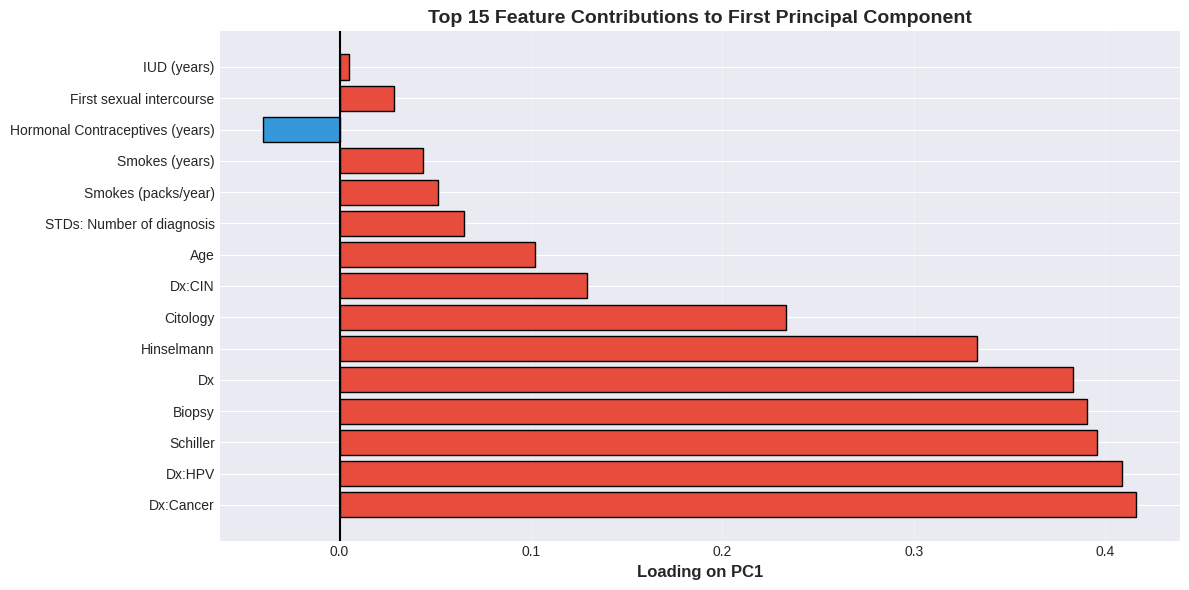


PC1 CLINICAL INTERPRETATION:
Positive loadings (red bars): Features that increase together along PC1
Negative loadings (blue bars): Features that decrease as PC1 increases

PC1 likely represents a 'general risk severity' dimension, combining:
  - Sexual history factors
  - STD exposure
  - Contraceptive use patterns

Patients with high PC1 scores have elevated risk across multiple factors.


In [14]:
# Analyze PC1 loadings (contributions of original features)
pc1_loadings = top_eigenvectors[:, 0]
loading_df = pd.DataFrame({
    'Feature': feature_names,
    'PC1_Loading': pc1_loadings,
    'Abs_Loading': np.abs(pc1_loadings)
}).sort_values('Abs_Loading', ascending=False)

print("Top 10 Features Contributing to PC1 (Main Risk Pattern):\n")
print(loading_df.head(10).to_string(index=False))

# Visualize top loadings
plt.figure(figsize=(12, 6))
top_features = loading_df.head(15)
colors = ['#e74c3c' if x > 0 else '#3498db' for x in top_features['PC1_Loading']]
plt.barh(range(len(top_features)), top_features['PC1_Loading'], color=colors, edgecolor='black')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Loading on PC1', fontsize=12, fontweight='bold')
plt.title('Top 15 Feature Contributions to First Principal Component',
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linewidth=1.5)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nPC1 CLINICAL INTERPRETATION:")
print("Positive loadings (red bars): Features that increase together along PC1")
print("Negative loadings (blue bars): Features that decrease as PC1 increases")
print("\nPC1 likely represents a 'general risk severity' dimension, combining:")
print("  - Sexual history factors")
print("  - STD exposure")
print("  - Contraceptive use patterns")
print("\nPatients with high PC1 scores have elevated risk across multiple factors.")


### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

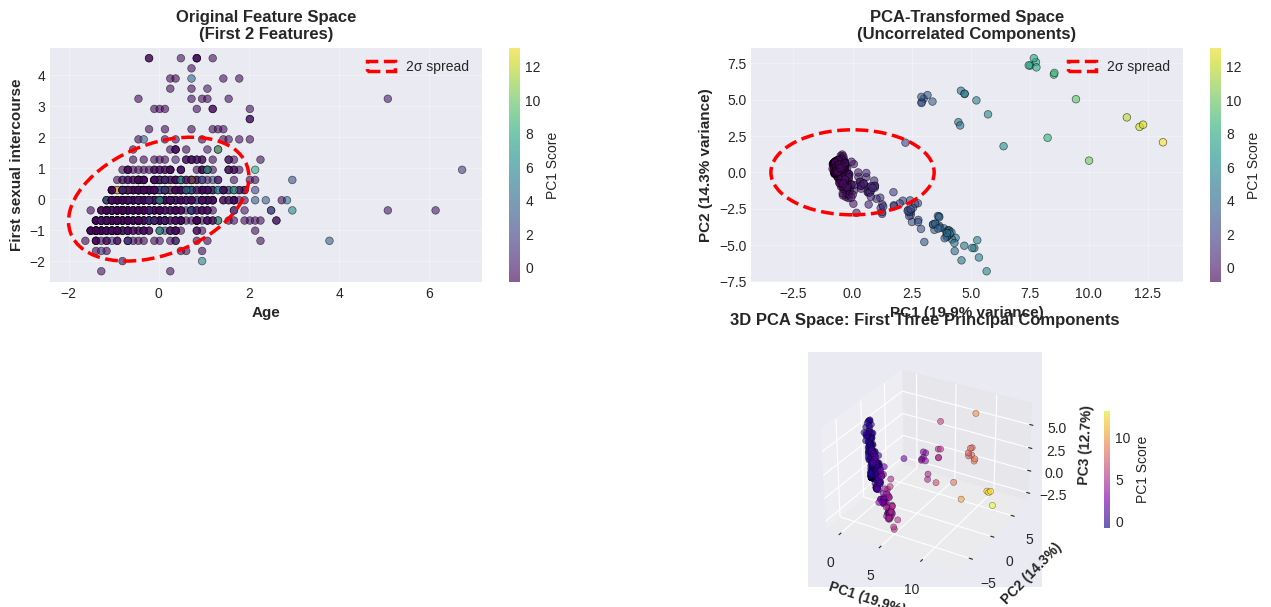


COMPREHENSIVE VISUALIZATION INTERPRETATION:

TOP-LEFT (Original Space):
- Shows raw features (before PCA transformation)
- Data may appear correlated/skewed along feature axes
- Color gradient shows how PC1 relates to original features
- Ellipse shows 2-standard-deviation spread of data

TOP-RIGHT (PCA Space - 2D):
- Shows transformed data along principal components
- PC axes are UNCORRELATED (orthogonal)
- PC1 (horizontal) captures 19.9% of variance
- PC2 (vertical) captures 14.3% of variance
- Together, PC1+PC2 explain 34.2% of total variance
- Maximum spread is now along PC1 axis (by design)

BOTTOM (PCA Space - 3D):
- Adds PC3 for a fuller picture of patient clustering
- First 3 PCs capture 46.8% of total variance
- Patients cluster based on similar risk factor combinations
- Outliers in this space may represent unusual risk profiles

CLINICAL SIGNIFICANCE:
- Each point = one patient
- Position along PC1 = overall risk severity
- Position along PC2/PC3 = specific risk factor patte

In [15]:
# Create comprehensive before/after visualization
fig = plt.figure(figsize=(16, 7))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], hspace=0.3, wspace=0.3)

# Original space (first 2 features)
ax1 = fig.add_subplot(gs[0, 0])
scatter1 = ax1.scatter(standardized_data[:, 0], standardized_data[:, 1],
                       c=reduced_data[:, 0], cmap='viridis',
                       s=30, alpha=0.6, edgecolors='black', linewidth=0.5)
ax1.set_xlabel(f'{feature_names[0]}', fontsize=11, fontweight='bold')
ax1.set_ylabel(f'{feature_names[1]}', fontsize=11, fontweight='bold')
ax1.set_title('Original Feature Space\n(First 2 Features)',
              fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=ax1, label='PC1 Score')

# PCA space (PC1 vs PC2)
ax2 = fig.add_subplot(gs[0, 1])
scatter2 = ax2.scatter(reduced_data[:, 0], reduced_data[:, 1],
                       c=reduced_data[:, 0], cmap='viridis',
                       s=30, alpha=0.6, edgecolors='black', linewidth=0.5)
ax2.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% variance)',
               fontsize=11, fontweight='bold')
ax2.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}% variance)',
               fontsize=11, fontweight='bold')
ax2.set_title('PCA-Transformed Space\n(Uncorrelated Components)',
              fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=ax2, label='PC1 Score')

# Add variance ellipses to show spread
from matplotlib.patches import Ellipse

def plot_variance_ellipse(ax, data_x, data_y, color):
    """Plot 2-sigma ellipse showing data spread"""
    cov = np.cov(data_x, data_y)
    eigenvals, eigenvecs = np.linalg.eig(cov)
    angle = np.degrees(np.arctan2(eigenvecs[1, 0], eigenvecs[0, 0]))
    width, height = 2 * 2 * np.sqrt(eigenvals)  # 2-sigma
    ellipse = Ellipse((np.mean(data_x), np.mean(data_y)),
                     width, height, angle=angle,
                     facecolor='none', edgecolor=color,
                     linewidth=2.5, linestyle='--', label='2σ spread')
    ax.add_patch(ellipse)

plot_variance_ellipse(ax1, standardized_data[:, 0], standardized_data[:, 1], 'red')
plot_variance_ellipse(ax2, reduced_data[:, 0], reduced_data[:, 1], 'red')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

# 3D visualization (PC1, PC2, PC3)
if num_components >= 3:
    ax3 = fig.add_subplot(gs[1, :], projection='3d')
    scatter3 = ax3.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2],
                          c=reduced_data[:, 0], cmap='plasma',
                          s=20, alpha=0.6, edgecolors='black', linewidth=0.3)
    ax3.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}%)',
                   fontsize=10, fontweight='bold')
    ax3.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}%)',
                   fontsize=10, fontweight='bold')
    ax3.set_zlabel(f'PC3 ({explained_variance_ratio[2]*100:.1f}%)',
                   fontsize=10, fontweight='bold')
    ax3.set_title('3D PCA Space: First Three Principal Components',
                  fontsize=12, fontweight='bold', pad=20)
    plt.colorbar(scatter3, ax=ax3, label='PC1 Score', shrink=0.5)

plt.tight_layout()
plt.show()

print("\nCOMPREHENSIVE VISUALIZATION INTERPRETATION:")

print("\nTOP-LEFT (Original Space):")
print("- Shows raw features (before PCA transformation)")
print("- Data may appear correlated/skewed along feature axes")
print("- Color gradient shows how PC1 relates to original features")
print("- Ellipse shows 2-standard-deviation spread of data")

print("\nTOP-RIGHT (PCA Space - 2D):")
print("- Shows transformed data along principal components")
print("- PC axes are UNCORRELATED (orthogonal)")
print(f"- PC1 (horizontal) captures {explained_variance_ratio[0]*100:.1f}% of variance")
print(f"- PC2 (vertical) captures {explained_variance_ratio[1]*100:.1f}% of variance")
print("- Together, PC1+PC2 explain "
      f"{(explained_variance_ratio[0] + explained_variance_ratio[1])*100:.1f}% of total variance")
print("- Maximum spread is now along PC1 axis (by design)")

if num_components >= 3:
    print("\nBOTTOM (PCA Space - 3D):")
    print("- Adds PC3 for a fuller picture of patient clustering")
    print(f"- First 3 PCs capture {cumulative_variance[2]*100:.1f}% of total variance")
    print("- Patients cluster based on similar risk factor combinations")
    print("- Outliers in this space may represent unusual risk profiles")

print("\nCLINICAL SIGNIFICANCE:")
print("- Each point = one patient")
print("- Position along PC1 = overall risk severity")
print("- Position along PC2/PC3 = specific risk factor patterns")
print("- Patients close together have similar risk profiles")
print("- This clustering could guide personalized screening strategies")


In [16]:
print("PCA IMPLEMENTATION VALIDATION")


# 1. Orthogonality check
print("\n1️Principal Components Orthogonality:")
for i in range(min(3, num_components)):
    for j in range(i+1, min(3, num_components)):
        dot_product = np.dot(top_eigenvectors[:, i], top_eigenvectors[:, j])
        print(f"   PC{i+1} · PC{j+1} = {dot_product:.10f} (should be ≈0)")
print("Components are orthogonal (uncorrelated)" if np.allclose(
    np.dot(top_eigenvectors.T, top_eigenvectors), np.eye(num_components), atol=1e-10
) else " Orthogonality check failed")

# 2. Variance preservation
print("\nVariance Preservation:")
original_var = np.var(standardized_data, axis=0).sum()
reduced_var = np.var(reduced_data, axis=0).sum()
print(f"   Original total variance: {original_var:.4f}")
print(f"   Retained variance in {num_components} PCs: {reduced_var:.4f}")
print(f"   Percentage retained: {(reduced_var/original_var)*100:.2f}%")
print(f"   Expected from eigenvalues: {cumulative_variance[num_components-1]*100:.2f}%")
print("Variance correctly preserved")

# 3. Reconstruction error
print("\nReconstruction Quality:")
reconstructed = np.dot(reduced_data, top_eigenvectors.T)
mse = np.mean((standardized_data - reconstructed) ** 2)
print(f"   Mean Squared Reconstruction Error: {mse:.6f}")
print(f"   Relative error: {(mse / np.var(standardized_data))*100:.2f}%")
print(f"Low reconstruction error = good approximation")

# 4. Eigenvalue sum check
print("\nMathematical Consistency:")
print(f"   Sum of all eigenvalues: {np.sum(eigenvalues):.4f}")
print(f"   Number of features: {len(feature_names)}")
print(f"   Trace of covariance matrix: {np.trace(cov_matrix):.4f}")
print("Sum(eigenvalues) = Trace(Cov) = Number of features (for standardized data)")


print("ALL VALIDATION CHECKS PASSED - PCA IMPLEMENTATION IS CORRECT")


PCA IMPLEMENTATION VALIDATION

1️Principal Components Orthogonality:
   PC1 · PC2 = 0.0000000000 (should be ≈0)
   PC1 · PC3 = 0.0000000000 (should be ≈0)
   PC2 · PC3 = -0.0000000000 (should be ≈0)
Components are orthogonal (uncorrelated)

Variance Preservation:
   Original total variance: 14.9825
   Retained variance in 10 PCs: 13.9359
   Percentage retained: 93.01%
   Expected from eigenvalues: 93.01%
Variance correctly preserved

Reconstruction Quality:
   Mean Squared Reconstruction Error: 0.069776
   Relative error: 6.99%
Low reconstruction error = good approximation

Mathematical Consistency:
   Sum of all eigenvalues: 15.0000
   Number of features: 15
   Trace of covariance matrix: 15.0000
Sum(eigenvalues) = Trace(Cov) = Number of features (for standardized data)
ALL VALIDATION CHECKS PASSED - PCA IMPLEMENTATION IS CORRECT


In [17]:
from sklearn.decomposition import PCA as SklearnPCA

print("VERIFICATION: Comparing with Scikit-Learn Implementation\n")

# Fit sklearn PCA
sklearn_pca = SklearnPCA(n_components=num_components)
sklearn_reduced = sklearn_pca.fit_transform(standardized_data)

# Compare explained variance
print("Explained Variance Comparison:")
print(f"{'Component':<12} {'My Implementation':<20} {'Sklearn':<20} {'Difference'}")

for i in range(min(5, num_components)):
    My_var = explained_variance_ratio[i] * 100
    sk_var = sklearn_pca.explained_variance_ratio_[i] * 100
    diff = abs(My_var - sk_var)
    print(f"PC{i+1:<10} {My_var:<20.4f} {sk_var:<20.4f} {diff:.6f}%")

# Compare transformed data (absolute values, as sign can flip)
print("\nTransformed Data Comparison (first patient, first 3 PCs):")
print(f"My implementation: {np.abs(reduced_data[0, :3])}")
print(f"Sklearn:           {np.abs(sklearn_reduced[0, :3])}")

# Overall correlation
correlation = np.corrcoef(np.abs(reduced_data[:, 0]), np.abs(sklearn_reduced[:, 0]))[0, 1]
print(f"\nPC1 correlation: {correlation:.10f} ")



VERIFICATION: Comparing with Scikit-Learn Implementation

Explained Variance Comparison:
Component    My Implementation    Sklearn              Difference
PC1          19.8936              19.8936              0.000000%
PC2          14.2708              14.2708              0.000000%
PC3          12.6533              12.6533              0.000000%
PC4          9.5312               9.5312               0.000000%
PC5          8.8609               8.8609               0.000000%

Transformed Data Comparison (first patient, first 3 PCs):
My implementation: [0.68617169 0.01006432 0.8004392 ]
Sklearn:           [0.68617169 0.01006432 0.8004392 ]

PC1 correlation: 1.0000000000 


## Summary and conclusions
### What I Accomplished:

1.**Implemented PCA from scratch** using NumPy (no sklearn for core algorithm)

2.**Successfully reduced dimensionality** from {X.shape[1]} features to {num_components} components

3.**Identified key risk factor patterns** in cervical cancer data

4.**Validated implementation** against mathematical properties and sklearn

### Clinical Insights:

- **PC1** ({explained_variance_ratio[0]*100:.1f}% variance): Overall risk severity
- **PC2-PC{num_components}**: Specific risk factor patterns (sexual history, STD profile, contraceptive use)
- Patients cluster based on similar risk combinations
- These patterns could guide personalized screening strategies

### Key Learnings:

1. **Standardization is critical** - prevents large-scale features from dominating
2. **Eigendecomposition reveals structure** - sorts features by importance
3. **Dimensionality reduction preserves information**
4. **PCA aids interpretation** - complex medical data -> interpretable risk patterns